In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon, ttest_rel

In [114]:
model_name = 'EnhancedCNN'
batch_size = 10
epochs = 50
k = 5

In [115]:
model1_results = pd.read_csv(f'results/{model_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
model2_results = pd.read_csv(f'results/{model_name}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')

C:\Users\PC\AppData\Local\Temp\ipykernel_16632\1335222780.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model1_results = pd.read_csv(f'results/{model_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
C:\Users\PC\AppData\Local\Temp\ipykernel_16632\1335222780.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model2_results = pd.read_csv(f'results/{model_name}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')


In [116]:
model1_results = model1_results[model1_results['Fold'] == 1]

In [117]:
model1_results

,Fold,Epoch,Average Val Loss,Val Acc,F1 Score,AUC
0,1,1,0.7518,52.00,0.4502,0.4964
1,1,2,0.7370,54.00,0.4760,0.5170
2,1,3,0.6921,52.00,0.4957,0.5054
3,1,4,0.6754,64.00,0.6003,0.6196
4,1,5,0.7213,53.33,0.4130,0.5036
5,1,6,0.7043,54.67,0.4747,0.5223
6,1,7,0.6741,60.67,0.5967,0.5964
7,1,8,0.6977,56.67,0.4949,0.5420
8,1,9,0.6777,58.00,0.5216,0.5571
9,1,10,0.6986,50.67,0.3889,0.4777


In [118]:
model2_results.columns

Index(['Epoch', 'Average Val Loss', 'Val Acc', 'F1 Score', 'AUC'], dtype='object')

In [119]:
f1_model1 = model1_results['F1 Score']
auc_model1 = model1_results['AUC']
accuracy_model1 = model1_results['Val Acc']

f1_model2 = model2_results['F1 Score']
auc_model2 = model2_results['AUC']
accuracy_model2 = model2_results['Val Acc']

results_model1 = np.array([f1_model1, auc_model1, accuracy_model1])
results_model2 = np.array([f1_model2, auc_model2, accuracy_model2])

In [120]:
results_model1.size

150

In [121]:
results_model2.size

150

In [122]:
print(f1_model1, f1_model2)

0     0.4502
1     0.4760
2     0.4957
3     0.6003
4     0.4130
5     0.4747
6     0.5967
7     0.4949
8     0.5216
9     0.3889
10    0.5567
11    0.4748
12    0.5453
13    0.4840
14    0.4730
15    0.4475
16    0.4062
17    0.4319
18    0.4716
19    0.5152
20    0.6283
21    0.4168
22    0.5283
23    0.4592
24    0.5116
25    0.5066
26    0.5043
27    0.5116
28    0.5664
29    0.5057
30    0.5216
31    0.4233
32    0.4719
33    0.5367
34    0.5137
35    0.4760
36    0.4854
37    0.4917
38    0.4903
39    0.4712
40    0.4622
41    0.4330
42    0.4514
43    0.4856
44    0.5065
45    0.5243
46    0.5317
47    0.5025
48    0.4385
49    0.4222
Name: F1 Score, dtype: float64 0     0.5318
1     0.5497
2     0.6325
3     0.6517
4     0.6132
5     0.6501
6     0.6861
7     0.6671
8     0.6249
9     0.6661
10    0.6949
11    0.6944
12    0.6923
13    0.6608
14    0.6691
15    0.6864
16    0.6712
17    0.6842
18    0.6346
19    0.6680
20    0.6249
21    0.6346
22    0.6661
23    0.6769
24    0

In [123]:
diff_f1 = f1_model1 - f1_model2
diff_auc = auc_model1 - auc_model2
diff_accuracy = accuracy_model1 - accuracy_model2

diff_data = np.array([diff_f1, diff_auc, diff_accuracy])

In [124]:
diff_data

array([[-8.160e-02, -7.370e-02, -1.368e-01, -5.140e-02, -2.002e-01,
        -1.754e-01, -8.940e-02, -1.722e-01, -1.033e-01, -2.772e-01,
        -1.382e-01, -2.196e-01, -1.470e-01, -1.768e-01, -1.961e-01,
        -2.389e-01, -2.650e-01, -2.523e-01, -1.630e-01, -1.528e-01,
         3.400e-03, -2.178e-01, -1.378e-01, -2.177e-01, -1.094e-01,
        -1.066e-01, -1.031e-01, -2.172e-01, -3.740e-02, -1.630e-01,
        -5.270e-02, -2.454e-01, -1.820e-01, -8.260e-02, -1.167e-01,
        -1.485e-01, -1.607e-01, -1.674e-01, -1.247e-01, -1.879e-01,
        -1.265e-01, -1.589e-01, -1.405e-01, -1.815e-01, -1.961e-01,
        -9.290e-02, -1.630e-01, -1.898e-01, -2.306e-01, -2.722e-01],
       [-3.640e-02, -3.300e-02, -1.417e-01, -3.380e-02, -1.171e-01,
        -1.317e-01, -9.070e-02, -1.290e-01, -8.140e-02, -1.936e-01,
        -1.103e-01, -1.564e-01, -1.296e-01, -1.267e-01, -1.853e-01,
        -2.073e-01, -2.010e-01, -2.165e-01, -1.522e-01, -1.457e-01,
        -1.260e-02, -1.370e-01, -1.418e-01, -1.

In [125]:
mean_diff_f1 = np.mean(diff_f1)
mean_diff_auc = np.mean(diff_auc)
mean_diff_accuracy = np.mean(diff_accuracy)

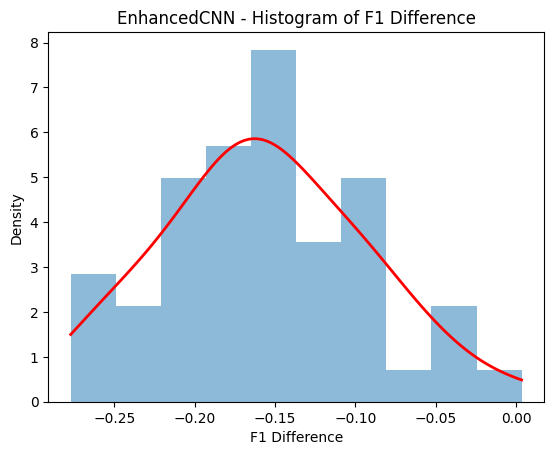

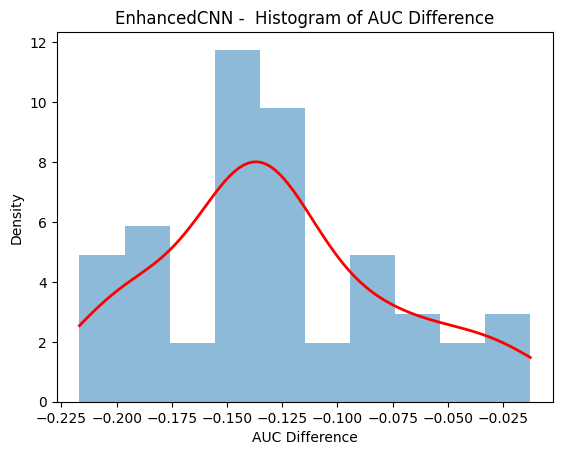

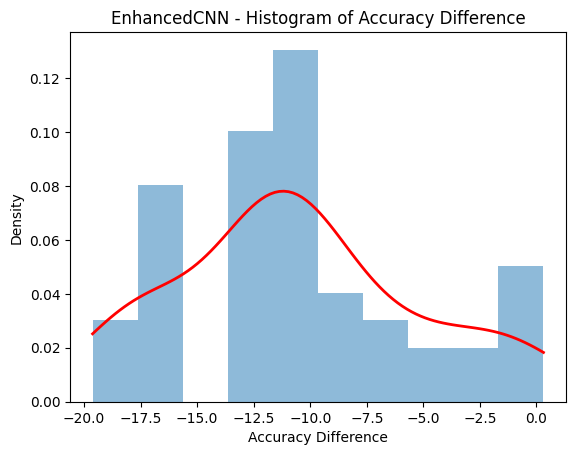

In [126]:
import scipy.stats as ss
# Generowanie histogramu dla różnicy F1
plt.hist(diff_f1, bins=10, alpha=0.5, density=True)
plt.xlabel('F1 Difference')
plt.ylabel('Density')
plt.title(f'{model_name} - Histogram of F1 Difference')

# Generowanie krzywej gęstości dla różnicy F1
x = np.linspace(min(diff_f1), max(diff_f1), 100)
density_f1 = ss.gaussian_kde(diff_f1)
plt.plot(x, density_f1(x), color='red', linewidth=2)

# Wyświetlanie histogramu z krzywą gęstości dla różnicy F1
plt.savefig(f'{model_name}_F1_difference_k{k}.svg')
plt.show()

# Analogicznie dla różnicy AUC
plt.hist(diff_auc, bins=10, alpha=0.5, density=True)
plt.xlabel('AUC Difference')
plt.ylabel('Density')
plt.title(f'{model_name} -  Histogram of AUC Difference')

x = np.linspace(min(diff_auc), max(diff_auc), 100)
density_auc = ss.gaussian_kde(diff_auc)
plt.plot(x, density_auc(x), color='red', linewidth=2)
plt.savefig(f'{model_name}_AUC_difference_k{k}.svg')
plt.show()

# Analogicznie dla różnicy Accuracy
plt.hist(diff_accuracy, bins=10, alpha=0.5, density=True)
plt.xlabel('Accuracy Difference')
plt.ylabel('Density')
plt.title(f'{model_name} - Histogram of Accuracy Difference')

x = np.linspace(min(diff_accuracy), max(diff_accuracy), 100)
density_accuracy = ss.gaussian_kde(diff_accuracy)
plt.plot(x, density_accuracy(x), color='red', linewidth=2)
plt.savefig(f'{model_name}_ACC_difference_k{k}.svg')
plt.show()

In [127]:
is_normal = True
for diff in diff_data:
    if len(diff) < 3:
        raise ValueError("Data must be at least length 3.")
    _, p_value = shapiro(diff)
    print("Shapiro-Wilk p-value:", p_value)
    if p_value < 0.05:
        is_normal = False

if is_normal:
    print("Difference distribution is normal.")
else:
    print("Difference distribution is not normal.")

#Pytanie: Czy dla wszystkich różnic musi być normalny?

Shapiro-Wilk p-value: 0.9389840364456177
Shapiro-Wilk p-value: 0.06095131114125252
Shapiro-Wilk p-value: 0.06467007100582123
Difference distribution is normal.


In [128]:
if is_normal:
    #test t-paired dla różnic (dla rozkładu normalnego)
    t_statistic, p_value_ttest = ttest_rel(results_model1, results_model2)
    print("T-Test p-values:", p_value_ttest)

    if any(p < 0.05 for p in p_value_ttest):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")
else:
    #test Wilcoxona dla różnic (dla rozkładu nienormalnego)
    _, p_value_wilcoxon = wilcoxon(results_model1, results_model2)
    print("Wilcoxon p-values:", p_value_wilcoxon)

    if any(p < 0.05 for p in p_value_wilcoxon):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")


T-Test p-values: [0.37492734 0.36737552 0.40976741 0.38404301 0.40139462 0.40601893
 0.40967857 0.40586371 0.4036373  0.40608146 0.40650237 0.40584789
 0.40798758 0.4054385  0.40973327 0.40891435 0.40705541 0.40872069
 0.40882274 0.40942018 0.40052001 0.40315441 0.41025305 0.40417893
 0.40425242 0.40419588 0.39749835 0.40844791 0.53467111 0.40836915
 0.40112991 0.40913103 0.40812432 0.39871683 0.40814511 0.40725558
 0.40612389 0.40736009 0.40974663 0.41028666 0.407988   0.40889949
 0.40941876 0.41066556 0.40974165 0.40720078 0.4071149  0.4053615
 0.40480284 0.40708149]
There is no significant difference between the two models (p-value >= 0.05)


In [113]:
# Filter out small differences
threshold = 1e-6
filtered_diff_data = diff_data[np.abs(diff_data) > threshold]
filtered_results_model1 = results_model1[np.abs(diff_data) > threshold]
filtered_results_model2 = results_model2[np.abs(diff_data) > threshold]

# Check if there are non-zero differences after filtering
if len(filtered_diff_data) > 0:
    _, p_value_wilcoxon = wilcoxon(filtered_results_model1, filtered_results_model2)
    print("Wilcoxon p-value:", p_value_wilcoxon)
    
    if p_value_wilcoxon < 0.05:
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")
else:
    print("No significant differences remain after filtering.")

Wilcoxon p-value: 2.2992025471682047e-26
There is a significant difference between the two models (p-value < 0.05)
